# Q7) Predicting Championship Potential from Team Chemistry

Datasets: Teams hustle (2017 - 2023) and championship wins (2017 - 2023).

Preparation: Analyze how these indicators correlate with team success over multiple seasons.

Analysis: Random Forest Tree to assess the predictive power of team chemistry on winning championships.

Interpretation: Evaluate the role of team chemistry in achieving success.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

In [ ]:
championship_wins = pd.read_csv('championship_wins.csv')
df_23_to_24 = pd.read_csv('nba_team_hustle_23_to_24.csv')
df_22_to_23 = pd.read_csv('nba_team_hustle_22_to_23.csv')
df_21_to_22 = pd.read_csv('nba_team_hustle_21_to_22.csv')
df_20_to_21 = pd.read_csv('nba_team_hustle_20_to_21.csv')
df_19_to_20 = pd.read_csv('nba_team_hustle_19_to_20.csv')
df_18_to_19 = pd.read_csv('nba_team_hustle_18_to_19.csv')
df_17_to_18 = pd.read_csv('nba_team_hustle_17_to_18.csv')

df_23_to_24['Year'] = 2023
df_22_to_23['Year'] = 2022
df_21_to_22['Year'] = 2021
df_20_to_21['Year'] = 2020
df_19_to_20['Year'] = 2019
df_18_to_19['Year'] = 2018
df_17_to_18['Year'] = 2017

df_17_to_24 = pd.concat([df_23_to_24, df_22_to_23, df_21_to_22, df_20_to_21, df_19_to_20, df_18_to_19, df_17_to_18], ignore_index=True)

# Merge the championship wins data with the main dataset
df = pd.merge(df_17_to_24, championship_wins, left_on=['TEAM', 'Year'], right_on=['Team', 'Year'], how='left')
df['Championship Winner'] = df['Team'].notna().astype(int)
df.drop(columns=['Team'], inplace=True)

In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head(10)

,team,min,screen_assists,screen_assists_pts,deflections,off_loose_balls_recovered,def_loose_balls_recovered,loose_balls_recovered,%_loose_balls_recovered_off,%_loose_balls_recovered_def,charges_drawn,contested_2pt_shots,contested_3pt_shots,contested_shots,year,championship_winner
0,Atlanta Hawks,48.3,10.1,23.8,16.9,2.4,2.7,5.1,46.9,53.1,0.56,27.3,18.6,45.9,2023,0
1,Boston Celtics,48.6,6.1,14.6,14.1,2.7,2.9,5.7,47.9,52.1,0.12,29.6,18.0,47.6,2023,0
2,Brooklyn Nets,48.3,9.0,20.2,12.8,2.8,2.7,5.4,50.6,49.4,0.13,24.2,21.9,46.1,2023,0
3,Charlotte Hornets,48.3,10.5,23.7,12.8,3.1,2.9,6.0,51.1,48.9,0.33,29.3,21.1,50.4,2023,0
4,Chicago Bulls,48.6,9.7,21.1,16.2,2.6,2.6,5.2,49.5,50.5,0.50,22.1,22.4,44.5,2023,0
5,Cleveland Cavaliers,48.3,9.9,22.3,13.7,2.6,2.4,5.0,51.8,48.2,0.29,30.2,16.5,46.7,2023,0
6,Dallas Mavericks,48.0,10.1,22.4,11.6,3.7,2.8,6.4,57.3,42.7,0.94,30.1,16.6,46.7,2023,0
7,Denver Nuggets,48.0,9.6,22.1,15.2,2.4,3.0,5.4,44.3,55.7,0.17,29.9,15.8,45.7,2023,1
8,Detroit Pistons,48.0,8.8,19.4,10.7,4.1,2.2,6.3,64.8,35.2,0.41,33.9,17.2,51.2,2023,0
9,Golden State Warriors,48.3,12.8,30.2,14.8,3.0,3.0,6.0,50.0,50.0,0.94,30.6,17.6,48.3,2023,0


In [ ]:
df.info()

missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)

summary_statistics = df.describe()
print("\nSummary Statistics:")
print(summary_statistics)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 0 to 209
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   team                         210 non-null    object 
 1   min                          210 non-null    float64
 2   screen_assists               210 non-null    float64
 3   screen_assists_pts           210 non-null    float64
 4   deflections                  210 non-null    float64
 5   off_loose_balls_recovered    210 non-null    float64
 6   def_loose_balls_recovered    210 non-null    float64
 7   loose_balls_recovered        210 non-null    float64
 8   %_loose_balls_recovered_off  210 non-null    float64
 9   %_loose_balls_recovered_def  210 non-null    float64
 10  charges_drawn                210 non-null    float64
 11  contested_2pt_shots          210 non-null    float64
 12  contested_3pt_shots          210 non-null    float64
 13  contested_shots     

<ipython-input-5-72485797c585>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


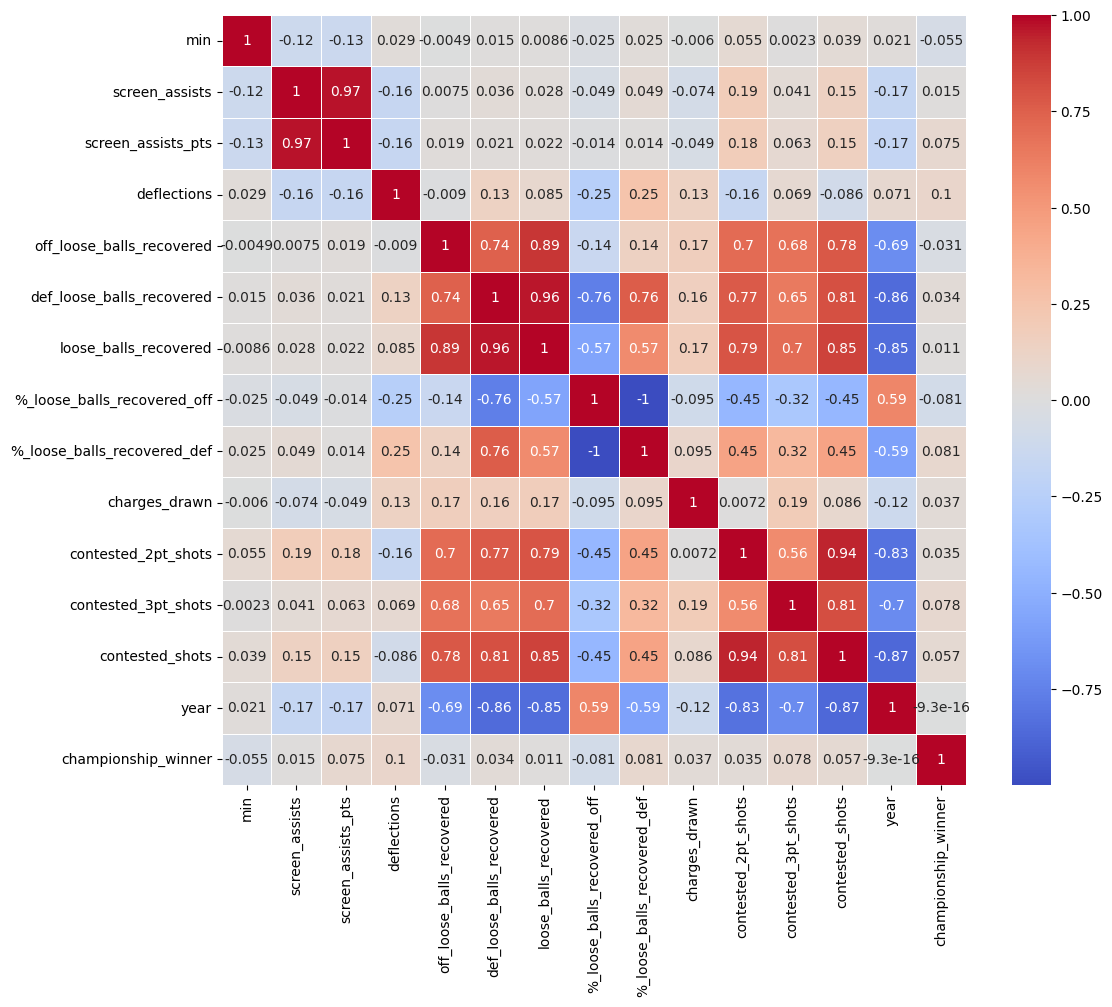

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

In [ ]:
# Feature Engineering
df['screen_assists_per_min'] = df['screen_assists'] / df['min']
df['deflections_ratio'] = df['deflections'] / df['contested_shots']
df['screen_contest_interaction'] = df['screen_assists'] * df['contested_shots']
df['screen_assists_square'] = df['screen_assists'] ** 2
df['screen_assists_mean'] = df.groupby('team')['screen_assists'].transform('mean')

# Normalization
df['min_normalized'] = (df['min'] - df['min'].min()) / (df['min'].max() - df['min'].min())

In [ ]:
# One-hot encode categorical columns
df = pd.get_dummies(df, columns=['team', 'year'], drop_first=True)

# Drop columns based on a naming pattern
team_columns_to_drop = [col for col in df.columns if col.startswith('team_')]
df = df.drop(columns=team_columns_to_drop)

year_columns_to_drop = [col for col in df.columns if col.startswith('year_')]
df = df.drop(columns=year_columns_to_drop)

df.head(3)

,min,screen_assists,screen_assists_pts,deflections,off_loose_balls_recovered,def_loose_balls_recovered,loose_balls_recovered,%_loose_balls_recovered_off,%_loose_balls_recovered_def,charges_drawn,contested_2pt_shots,contested_3pt_shots,contested_shots,championship_winner,screen_assists_per_min,deflections_ratio,screen_contest_interaction,screen_assists_square,min_normalized,screen_assists_mean
0,48.3,10.1,23.8,16.9,2.4,2.7,5.1,46.9,53.1,0.56,27.3,18.6,45.9,0,0.209110,0.368192,463.59,102.01,0.333333,9.685714
1,48.6,6.1,14.6,14.1,2.7,2.9,5.7,47.9,52.1,0.12,29.6,18.0,47.6,0,0.125514,0.296218,290.36,37.21,0.666667,8.971429
2,48.3,9.0,20.2,12.8,2.8,2.7,5.4,50.6,49.4,0.13,24.2,21.9,46.1,0,0.186335,0.277657,414.90,81.00,0.333333,9.642857


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

features = df.drop(columns=['championship_winner'])
target = df['championship_winner']

smote = SMOTE(random_state=88, k_neighbors=5)
features_resampled, target_resampled = smote.fit_resample(features, target)

X_train, X_test, y_train, y_test = train_test_split(features_resampled, target_resampled, test_size=0.3, random_state=88, stratify=target_resampled)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV

rf_grid_values = {
    'ccp_alpha': np.linspace(0, 0.10, 201),
    'min_samples_leaf': [5, 10],
    'min_samples_split': [10, 20],
    'max_depth': [20, 30],
    'random_state': [88]
}

class_weights = {0: 1, 1: 15}
rf_model = RandomForestClassifier(class_weight=class_weights)

smote = SMOTE(random_state=88, k_neighbors=4)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

stratified_kfold = StratifiedKFold(n_splits=6, shuffle=True, random_state=88)

grid_search = GridSearchCV(rf_model, rf_grid_values, cv=stratified_kfold, scoring='f1')
grid_search.fit(X_train_scaled, y_train_resampled)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_rf_model = RandomForestClassifier(**best_params, class_weight=class_weights)
best_rf_model.fit(X_train_scaled, y_train_resampled)

threshold = 0.4
y_pred_prob = best_rf_model.predict_proba(X_test_scaled)[:, 1]
y_pred_adjusted = (y_pred_prob > threshold).astype(int)

Best Hyperparameters: {'ccp_alpha': 0.0, 'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 10, 'random_state': 88}


In [ ]:
accuracy = balanced_accuracy_score(y_test, y_pred_adjusted)
precision = precision_score(y_test, y_pred_adjusted, zero_division=1)
recall = recall_score(y_test, y_pred_adjusted)
f1 = f1_score(y_test, y_pred_adjusted)
conf_matrix = confusion_matrix(y_test, y_pred_adjusted)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.93
Precision: 0.88
Recall: 0.98
F1 Score: 0.93

Confusion Matrix:
[[53  8]
 [ 1 60]]


In [ ]:
def OSR2(model, X_test, y_test, y_train):
    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
    return (1 - SSE/SST)

In [ ]:
print('OSR2:', round(OSR2(best_rf_model, X_test_scaled, y_test, y_train_resampled), 5))

OSR2: 0.70492


In [ ]:
feature_importances = best_rf_model.feature_importances_

importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importance_df)

Feature Importances:
                        Feature  Importance
3                   deflections    0.342324
10          contested_2pt_shots    0.111721
17               min_normalized    0.081849
0                           min    0.075024
8   %_loose_balls_recovered_def    0.061630
14            deflections_ratio    0.056767
4     off_loose_balls_recovered    0.054793
7   %_loose_balls_recovered_off    0.052112
15   screen_contest_interaction    0.035640
12              contested_shots    0.033041
18          screen_assists_mean    0.019345
13       screen_assists_per_min    0.014306
2            screen_assists_pts    0.013732
1                screen_assists    0.013403
16        screen_assists_square    0.010915
6         loose_balls_recovered    0.007733
5     def_loose_balls_recovered    0.006609
11          contested_3pt_shots    0.005822
9                 charges_drawn    0.003234
